# **Email/Sms Spam Classification**

In [14]:
# importing neccessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

## **importing dataset**

In [15]:
# importing dataset
df = pd.read_csv('data.csv',encoding='ISO-8859-1')

## **1) Data Cleaning**

In [16]:
# taking 5 samples from dataset
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2832,spam,You've won tkts to the EURO2004 CUP FINAL or å...,NaN,NaN,NaN
5188,ham,Okie,NaN,NaN,NaN
2820,ham,Oh god..taken the teeth?is it paining,NaN,NaN,NaN
1958,ham,"Lol ... Oh no babe, I wont be sliding into you...",NaN,NaN,NaN
3915,ham,Ok. C u then.,NaN,NaN,NaN


In [17]:
# taking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
# selected columns v1(label)  and v2(text)
df = df[['v1','v2']].rename(columns={'v1': 'label', 'v2': 'text'})

In [19]:
# no null values
# check duplicates values
df.duplicated().sum()

403

In [20]:
# remove duplicates from data
df.drop_duplicates(inplace=True)

In [21]:
# rename the ham as 0 and spam as 1
df['label'].replace(['ham', 'spam'], [0, 1], inplace=True)

## **2) EDA**

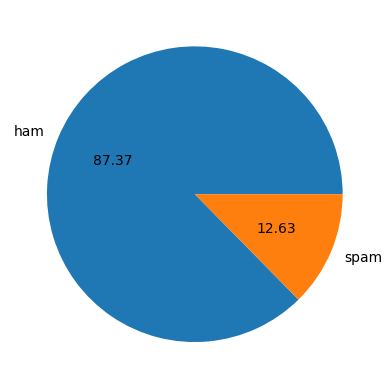

In [22]:
# ploting spams and not spams as pie chart
values = df['label'].value_counts()
plt.pie(values,labels=['ham','spam'] , autopct="%.2f")
plt.show()

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
# finding the characters , words and sentences count in each email/sms
df['character_count'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['sentence_count'] =df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
# describing data
df[['character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# describing spam sms/email
df[df['label'] == 1][['character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
# describing ham sms/email
df[df['label'] == 0][['character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='character_count', ylabel='Count'>

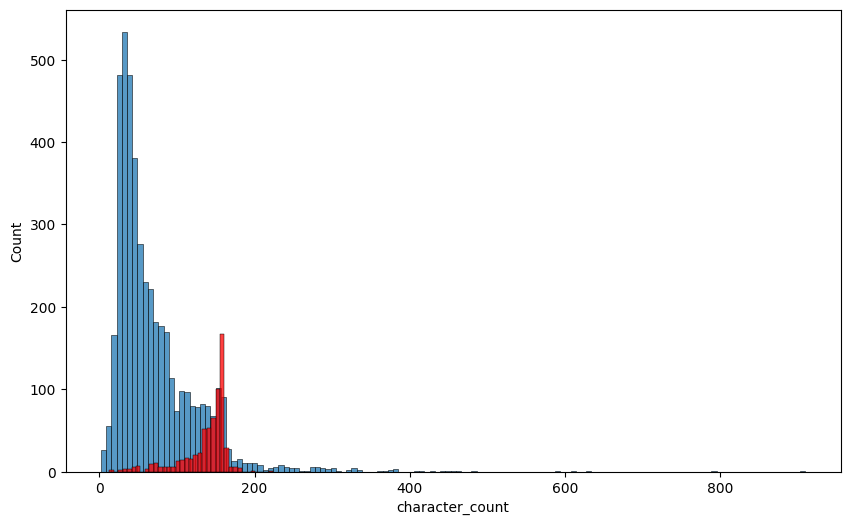

In [28]:
# ploting histogram for character_count for both spam and ham
plt.figure(figsize=(10,6))
sns.histplot(df[df['label'] == 0]['character_count'])
sns.histplot(df[df['label'] == 1]['character_count'],color='red')

In [29]:
df[['label','character_count','word_count','sentence_count']].corr()

,label,character_count,word_count,sentence_count
label,1.000000,0.384717,0.262912,0.263939
character_count,0.384717,1.000000,0.965760,0.624139
word_count,0.262912,0.965760,1.000000,0.679971
sentence_count,0.263939,0.624139,0.679971,1.000000


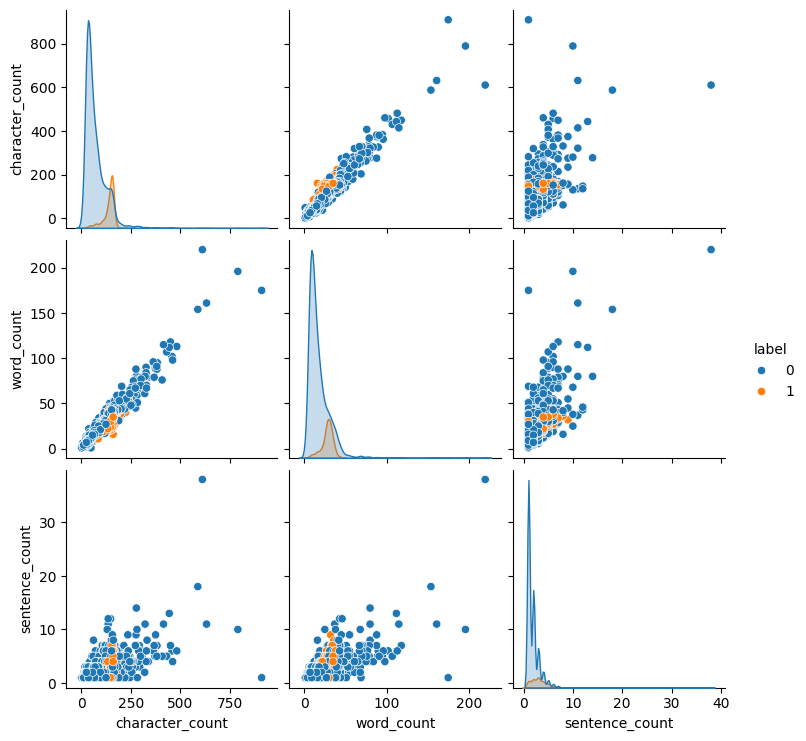

In [30]:
# pair plot
sns.pairplot(df,hue='label')

## **3) Data Preprocessing**

In [31]:
# split labels and text
X = df['text']
y = df['label']

### **1) Stemming**

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [34]:
# stemming the words
from nltk.stem import PorterStemmer
import re
port_stem = PorterStemmer()
def stemming(text):
  stem_text=re.sub('[^a-zA-Z0-9 ]',' ',text).lower().split()
  stem_text=[port_stem.stem(word) for word in stem_text if not word in stopwords.words('english')]
  stem_text = ' '.join(stem_text)
  return stem_text


In [35]:
# apply stemming method
X = X.apply(stemming)

In [36]:
from wordcloud import WordCloud
wc = WordCloud(width=400,height=400,min_font_size=10,background_color='white')
def cloud(label):
  text = ''
  for i in range(y.shape[0]):
    if y.iloc[i] == label:
      text += X.iloc[i] + " "
  wc.generate(text)
  return wc.to_image()

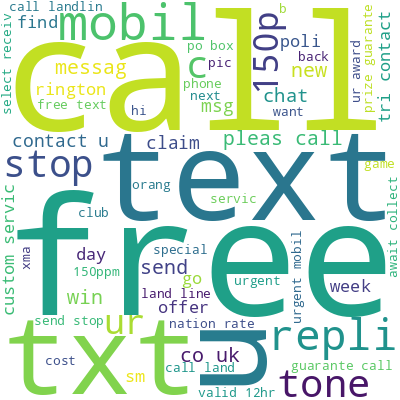

In [37]:
# display word cloudWord from spam
cloud(1)

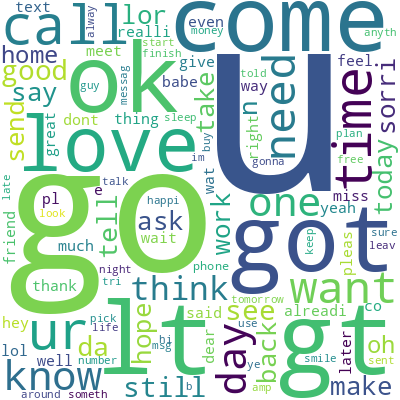

In [38]:
# display word cloudWord from ham
cloud(0)

In [39]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

###**2) vectorizating**




In [40]:
# vectorization of text
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [41]:
vectorizer.vocabulary_

{'cool': 205,
 'come': 193,
 'havent': 392,
 'wine': 962,
 'huh': 424,
 'late': 478,
 'fr': 330,
 'dinner': 248,
 'ex': 294,
 'wife': 959,
 'abl': 50,
 'kid': 464,
 'want': 934,
 'one': 619,
 'day': 229,
 'hope': 413,
 'ur': 912,
 'head': 393,
 'hurt': 427,
 'much': 576,
 'way': 941,
 'stay': 818,
 'tonight': 878,
 'round': 730,
 'like': 501,
 'guess': 379,
 'pub': 682,
 'im': 434,
 'happi': 389,
 'whatev': 954,
 'say': 744,
 'ok': 613,
 'set': 763,
 'let': 495,
 'noe': 601,
 'detail': 241,
 'later': 479,
 'anyth': 81,
 'lar': 476,
 'go': 361,
 'home': 411,
 'bring': 144,
 'tat': 844,
 'cd': 169,
 'forget': 326,
 'stop': 821,
 'call': 151,
 'everyon': 292,
 'might': 551,
 'cancer': 159,
 'talk': 842,
 'answer': 79,
 'get': 354,
 'monday': 565,
 'tell': 849,
 'treat': 889,
 'hi': 403,
 'busi': 149,
 'guy': 380,
 'tri': 890,
 'bother': 138,
 'exam': 295,
 'car': 161,
 'gr8': 372,
 '18': 21,
 'inform': 442,
 'latest': 480,
 'news': 593,
 'result': 717,
 'unsubscrib': 910,
 'send': 759,
 '

##**4) Model Training**

In [42]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [43]:
# model training
gnb.fit(X_train,y_train)
mnb.fit(X_train,y_train)
bnb.fit(X_train,y_train)

BernoulliNB()

##**5) Model Evaluation**

In [44]:
from sklearn.metrics import accuracy_score, precision_score
y_pred1=gnb.predict(X_test)
y_pred2=mnb.predict(X_test)
y_pred3=bnb.predict(X_test)

In [45]:
# accuracy Score and Precision Score
print("For Gaussian Naive Bayes")
print("accuracy Score",accuracy_score(y_test,y_pred1))
print("precision Score",precision_score(y_test,y_pred1))
print("-"*50)
print("For Multinomial Naive Bayes")
print("accuracy Score",accuracy_score(y_test,y_pred2))
print("precision Score",precision_score(y_test,y_pred2))
print("-"*50)
print("For Bernoulli Naive Bayes")
print("accuracy Score",accuracy_score(y_test,y_pred3))
print("precision Score",precision_score(y_test,y_pred3))

For Gaussian Naive Bayes
accuracy Score 0.7901353965183753
precision Score 0.36477987421383645
--------------------------------------------------
For Multinomial Naive Bayes
accuracy Score 0.9729206963249516
precision Score 0.9557522123893806
--------------------------------------------------
For Bernoulli Naive Bayes
accuracy Score 0.9874274661508704
precision Score 1.0


### **Cross validation**

In [46]:
# selected model  Bernoulli Naive Bayes
from sklearn.model_selection import cross_validate

scoring = ['precision_macro', 'accuracy']
results = cross_validate(bnb, X_test, y_test, cv=5, scoring=scoring)

print("Precision scores:", results['test_precision_macro'])
print("Accuracy scores:", results['test_accuracy'])
print("Average precision:", results['test_precision_macro'].mean())
print("Average accuracy:", results['test_accuracy'].mean())

Precision scores: [0.97883598 0.98918919 0.98138298 0.98387097 0.97447514]
Accuracy scores: [0.96135266 0.98067633 0.96618357 0.97101449 0.98543689]
Average precision: 0.9815508505224109
Average accuracy: 0.972932789268796


## **Exporting model**

In [48]:
import pickle
pickle.dump(bnb, open('model.pkl','wb'))
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))